## EDA and visualization

In this notebook, we explore cleaned movie data using visualizations.
Goals: understand distributions of budgets/revenues, trends across genres and time, and correlations among features.

### Loading data

In [47]:
import pandas as pd
import glob

files = sorted(glob.glob("../data/processed/clean/clean_split_part*.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
print(df.shape)
df.head()

(3229, 29)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_count,cast,crew,release_year,release_month,profit,roi,main_genre,cast_size,director_name
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,12,2.550965e+09,11.763566,Action,83,James Cameron
1,300000000.0,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,4500,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007,5,6.610000e+08,3.203333,Adventure,34,Gore Verbinski
2,245000000.0,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,4466,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015,10,6.356746e+08,3.594590,Action,83,Sam Mendes
3,250000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,9106,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012,7,8.349391e+08,4.339756,Action,158,Christopher Nolan
4,260000000.0,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2124,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012,3,2.413910e+07,1.092843,Action,27,Andrew Stanton


### Some distributions

C:\Users\Ja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


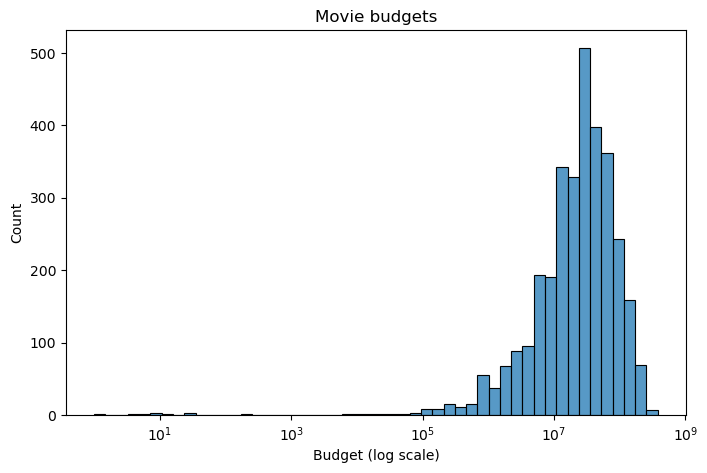

C:\Users\Ja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


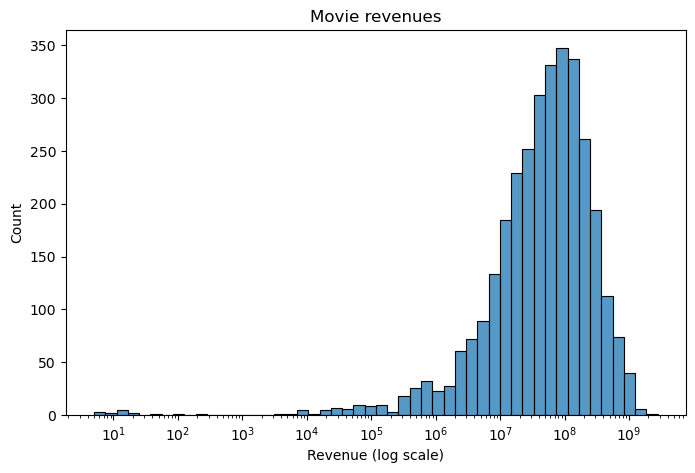

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("../plots", exist_ok=True)

# Budget distribution
plt.figure(figsize=(8,5))
sns.histplot(df['budget'].dropna(), bins=50, log_scale=(True, False))
plt.title("Movie budgets")
plt.xlabel("Budget (log scale)")
plt.ylabel("Count")
plt.savefig("../plots/budget_distribution.png")
plt.show()

# Revenue distribution
plt.figure(figsize=(8,5))
sns.histplot(df['revenue'].dropna(), bins=50, log_scale=(True, False))
plt.title("Movie revenues")
plt.xlabel("Revenue (log scale)")
plt.ylabel("Count")
plt.savefig("../plots/revenue_distribution.png")
plt.show()

**Budget vs revenue:**

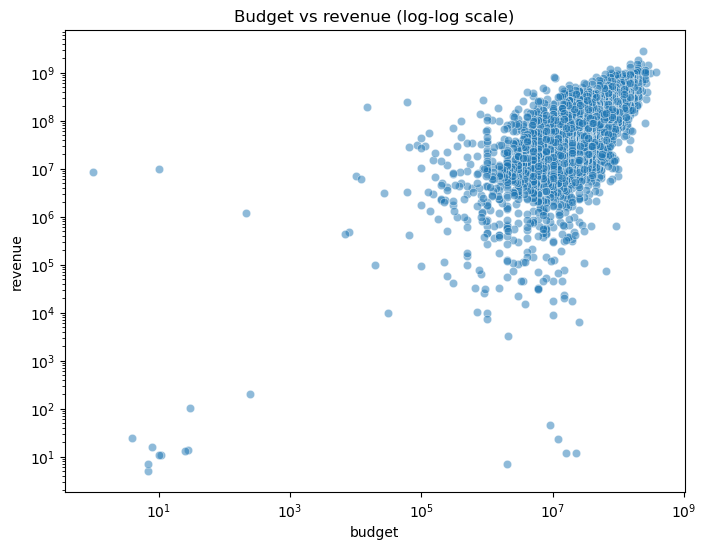

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("Budget vs revenue (log-log scale)")
plt.savefig("../plots/budget_vs_revenue.png")
plt.show()

Some movies show quite low budgets or revenues, we try to look into what titles those are:

In [48]:
# 1. Movies with budget < 1000
low_budget = df[df['budget'] < 1e3][['title', 'budget']]
print("Movies with budget < 1,000")
display(low_budget)

# 2. Movies with revenue < 1000
low_revenue = df[df['revenue'] < 1e3][['title', 'revenue']]
print("Movies with revenue < 1,000")
display(low_revenue)

# 3. Movies with budget < 1000 AND revenue < 1000
low_both = df[(df['budget'] < 1e3) & (df['revenue'] < 1e3)][['title', 'budget', 'revenue']]
print("Movies with both budget < 1,000 and revenue < 1,000")
display(low_both)

Movies with budget < 1,000


,title,budget
1413,Rugrats in Paris: The Movie,30.0
1579,The 51st State,28.0
1694,Angela's Ashes,25.0
2405,F.I.S.T.,11.0
2521,Of Horses and Men,10.0
2522,Nurse 3-D,10.0
2652,Split Second,7.0
2671,Bran Nue Dae,7.0
2791,A Farewell to Arms,4.0
3078,Modern Times,1.0


Movies with revenue < 1,000


,title,revenue
1413,Rugrats in Paris: The Movie,103.0
1487,Chasing Liberty,12.0
1579,The 51st State,14.0
1694,Angela's Ashes,13.0
1809,Death at a Funeral,46.0
2105,The Cookout,12.0
2372,In the Cut,23.0
2405,F.I.S.T.,11.0
2521,Of Horses and Men,11.0
2652,Split Second,5.0


Movies with both budget < 1,000 and revenue < 1,000


,title,budget,revenue
1413,Rugrats in Paris: The Movie,30.0,103.0
1579,The 51st State,28.0,14.0
1694,Angela's Ashes,25.0,13.0
2405,F.I.S.T.,11.0,11.0
2521,Of Horses and Men,10.0,11.0
2652,Split Second,7.0,5.0
2671,Bran Nue Dae,7.0,7.0
2791,A Farewell to Arms,4.0,25.0
3187,The Prophecy,8.0,16.0
3194,I Married a Strange Person!,250.0,203.0


After investigating a few of them on Wikipedia, it turned out at least some of these values are not truly that low — instead, they were recorded in the wrong scale. For example, a budget listed as `250` in the dataset actually represent `250000`. This kind of issue may happen in scraped datasets where numbers may be entered in thousands or millions but stored as raw integers without scaling

### Handling incorrectly scaled budget and revenue

1. We identified all movies with budget < 1000 or revenue < 1000.  
2. For each case, we manually cross-checked the true values on Wikipedia (or other reliable sources).  
3. We then built a correction dictionary (`corrections`) to update the dataset.  

In [49]:
corrections_revenue = {
    "Rugrats in Paris: The Movie": {"revenue": 103300000}, 
    "Chasing Liberty": {"revenue": 12000000}, 
    "The 51st State": {"revenue": 14400000}, 
    "Angela's Ashes": {"revenue": 37300000}, 
    "Death at a Funeral": {"revenue": 46800000}, 
    "The Cookout": {"revenue": 12000000}, 
    "In the Cut": {"revenue": 23700000}, 
    "F.I.S.T.": {"revenue": 20300000}, 
    "Of Horses and Men": {"revenue": 240000}, 
    "Split Second": {"revenue": 5400000}, 
    "Bran Nue Dae": {"revenue": 6400000}, 
    "A Farewell to Arms": {"revenue": 1000000}, 
    "Dreaming of Joseph Lees": {"revenue": 1200000}, 
    "The Prophecy": {"revenue": 16100000}, 
    "I Married a Strange Person!": {"revenue": 467272}, 
}

for title, vals in corrections_revenue.items():
    for col, new_val in vals.items():
        df.loc[df['title'] == title, col] = new_val

In [50]:
corrections_budget = {
    "Rugrats in Paris: The Movie": {"budget": 30000000},
    "The 51st State": {"budget": 27000000},
    "Angela's Ashes": {"budget": 25000000},
    "F.I.S.T.": {"budget": 8000000},
    "Of Horses and Men": {"budget": 10000000},
    "Nurse 3-D": {"budget": 10000000},
    "Split Second": {"budget": 7000000},
    "Bran Nue Dae": {"budget": 6750000},
    "A Farewell to Arms": {"budget": 900000},
    "Modern Times": {"budget": 1500000},
    "Tarnation": {"budget": 218},
    "The Prophecy": {"budget": 0},
    "I Married a Strange Person!": {"budget": 250000},
}

for title, vals in corrections_budget.items():
    for col, new_val in vals.items():
        df.loc[df['title'] == title, col] = new_val

Notes:  
"Tarnation" actually had a very low budget.  
For "Brain Nua Dae" different info can be found on the internet - we follow the website the-numbers.com that suggests the revenue was actually smaller than the budget.  
No budget could be found for "The Prophecy" - will be removed from the dataset.

In [51]:
df = df[df['title'] != "The Prophecy"]

Redoing the plots:

C:\Users\Ja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


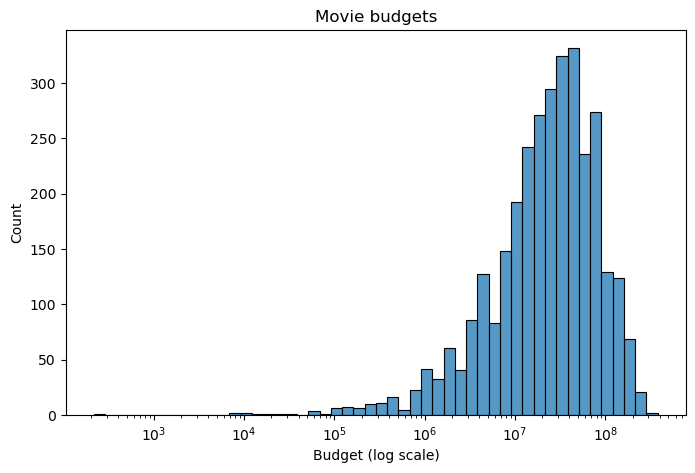

C:\Users\Ja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


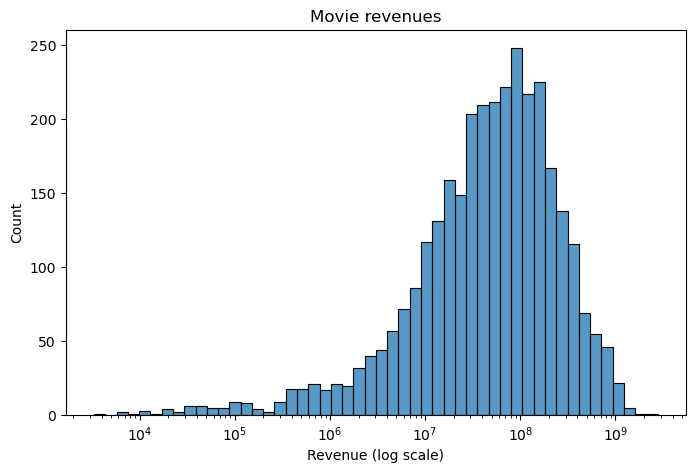

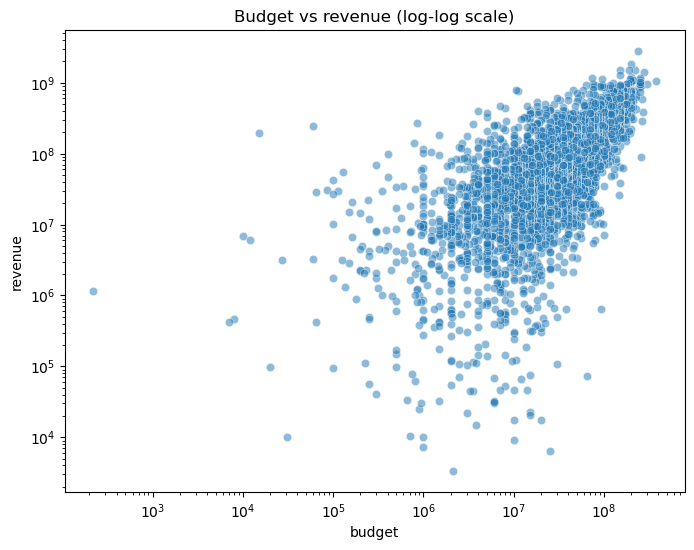

In [52]:
# Budget distribution
plt.figure(figsize=(8,5))
sns.histplot(df['budget'].dropna(), bins=50, log_scale=(True, False))
plt.title("Movie budgets")
plt.xlabel("Budget (log scale)")
plt.ylabel("Count")
plt.savefig("../plots/budget_distribution.png")
plt.show()

# Revenue distribution
plt.figure(figsize=(8,5))
sns.histplot(df['revenue'].dropna(), bins=50, log_scale=(True, False))
plt.title("Movie revenues")
plt.xlabel("Revenue (log scale)")
plt.ylabel("Count")
plt.savefig("../plots/revenue_distribution.png")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("Budget vs revenue (log-log scale)")
plt.savefig("../plots/budget_vs_revenue.png")
plt.show()

### Runtime vs revenue

C:\Users\Ja\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


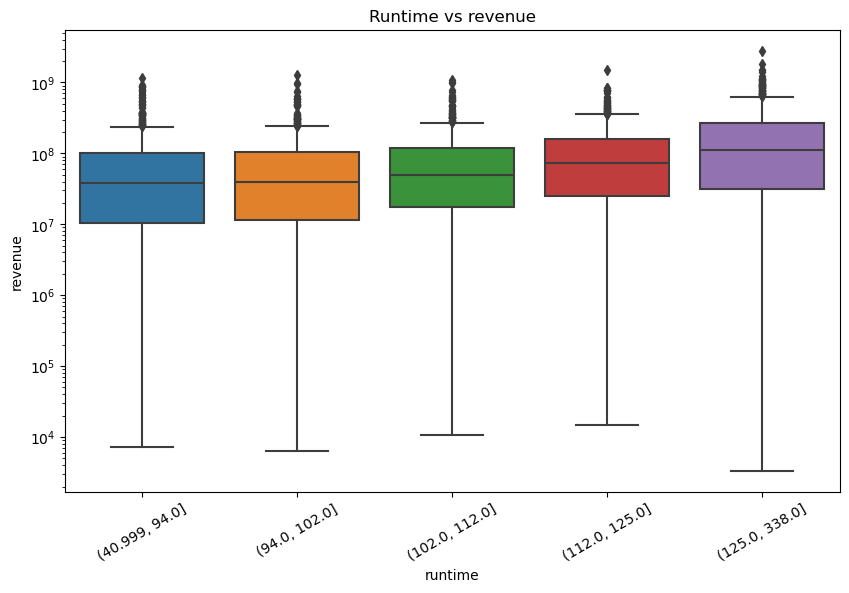

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x=pd.qcut(df['runtime'], q=5), y=df['revenue'])
plt.yscale("log")
plt.xticks(rotation=30)
plt.title("Runtime vs revenue")
plt.savefig("../plots/runtime_vs_revenue.png")
plt.show()

We observe the median revenue grows along with the runtime

### Genre revenue

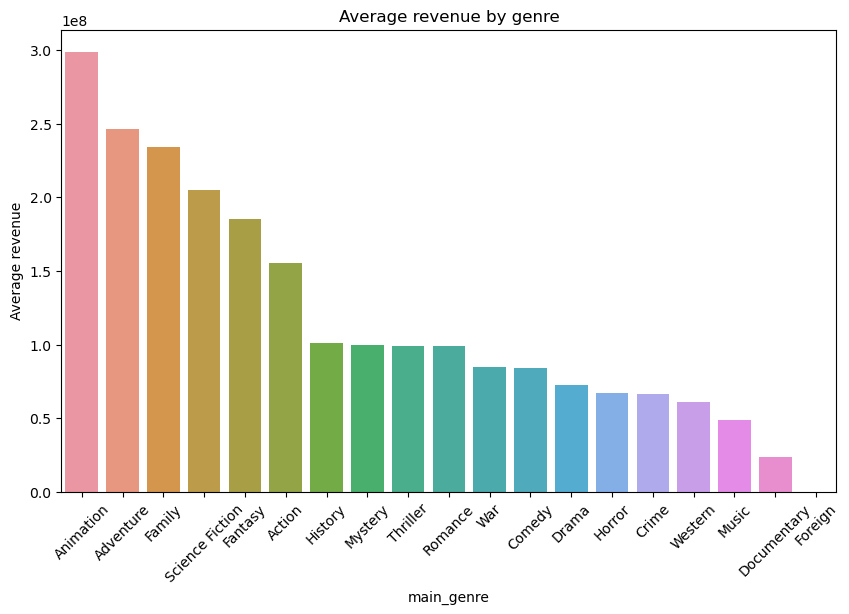

In [54]:
genre_revenue = df.groupby(['main_genre'])['revenue'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="main_genre", y="revenue", data=genre_revenue)
plt.xticks(rotation=45)
plt.ylabel("Average revenue")
plt.title("Average revenue by genre")
plt.savefig("../plots/revenue_by_genre.png")
plt.show()

In [56]:
df[df['main_genre']=='Foreign'][['title', 'original_language', 'release_year', 'revenue']]

,title,original_language,release_year,revenue
3199,Burn,en,2012,111300.0


Fast cross-check shows that the movie "Burn" is not really foreign, but actually its second genre: a documentary. We correct it and update the plot.

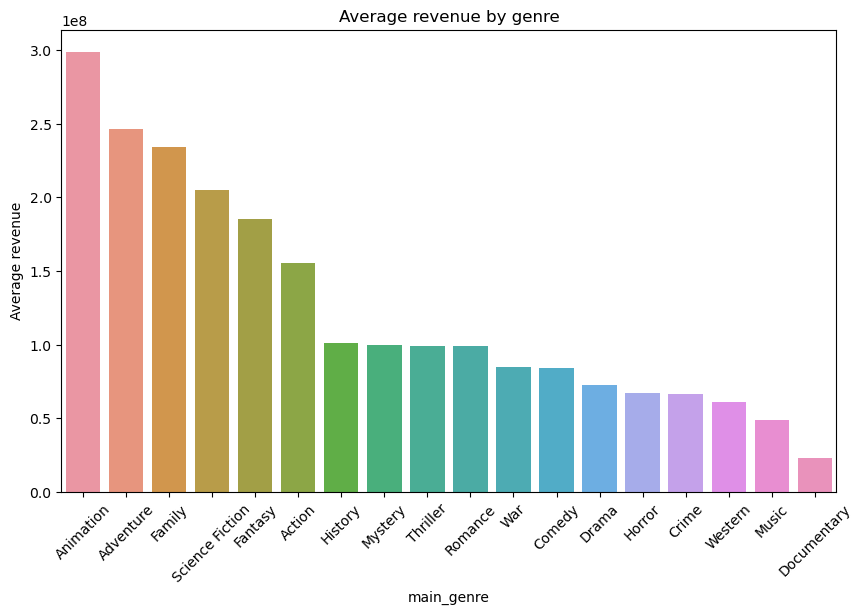

In [60]:
df.loc[df['title'] == 'Burn', 'main_genre'] = 'Documentary'

genre_revenue = df.groupby(['main_genre'])['revenue'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="main_genre", y="revenue", data=genre_revenue)
plt.xticks(rotation=45)
plt.ylabel("Average revenue")
plt.title("Average revenue by genre")
plt.savefig("../plots/revenue_by_genre.png")
plt.show()

### Yearly trends

C:\Users\Ja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


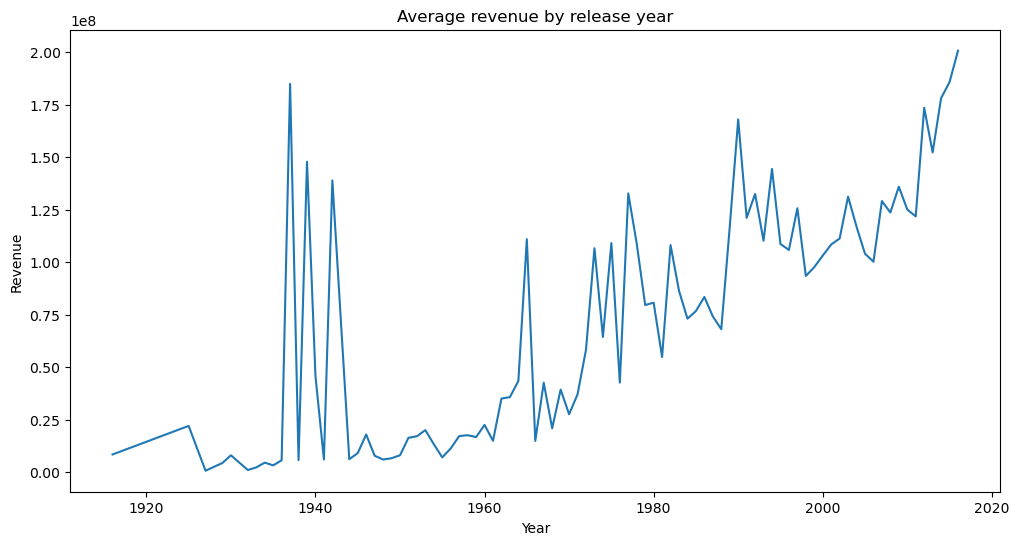

In [62]:
yearly_revenue = df.groupby('release_year')['revenue'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values)
plt.title("Average revenue by release year")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.savefig("../plots/revenue_by_year.png")
plt.show()

We observe an interesting spike around 1940s:

In [66]:
df[df['release_year'].between(1935, 1945)].sort_values('revenue', ascending=False)[['title','release_year','revenue']]

,title,release_year,revenue
2880,Gone with the Wind,1939,400176459.0
3140,Bambi,1942,267447150.0
3082,Snow White and the Seven Dwarfs,1937,184925486.0
1031,Pinocchio,1940,84300000.0
2997,Fantasia,1940,83320000.0
2968,The Wizard of Oz,1939,33754967.0
3088,The Lost Weekend,1945,11000000.0
3104,Casablanca,1942,10462500.0
3065,Mr. Smith Goes to Washington,1939,9600000.0
3015,Boom Town,1940,9172000.0


Those highest-grossing movies seem to be all-time classics ("Gone with the Wind", "Bambi", "Snow Whote"), their revenue is most likely summed over all of the time until now, since their income was still significant even years after their release.

### Correlations

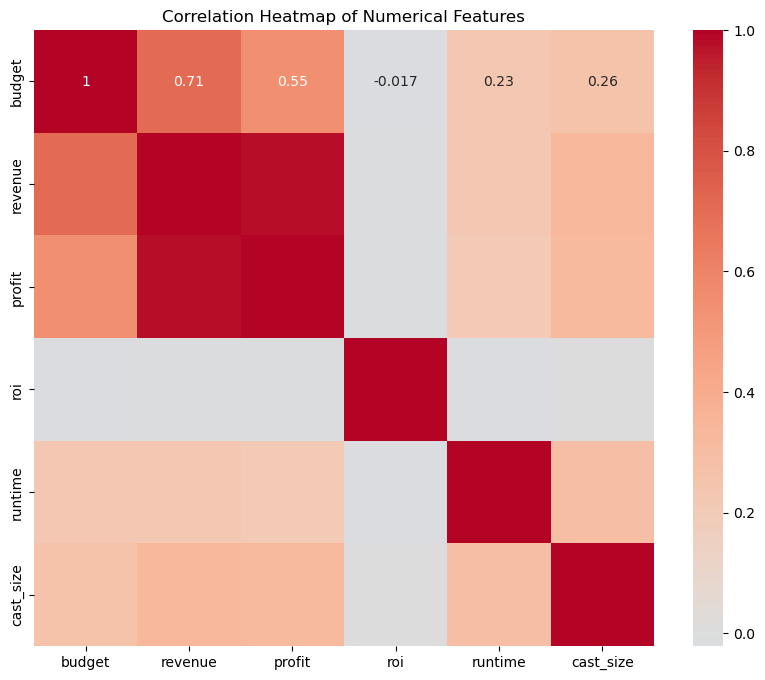

In [68]:
plt.figure(figsize=(10,8))
corr = df[['budget','revenue','profit','roi','runtime','cast_size']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.savefig("../plots/correlation_heatmap.png")
plt.show()

Besides the correlations between budget, revenue and profit, we also observe some ligh correlation of revenue with runtime and cast size.

### Top directors

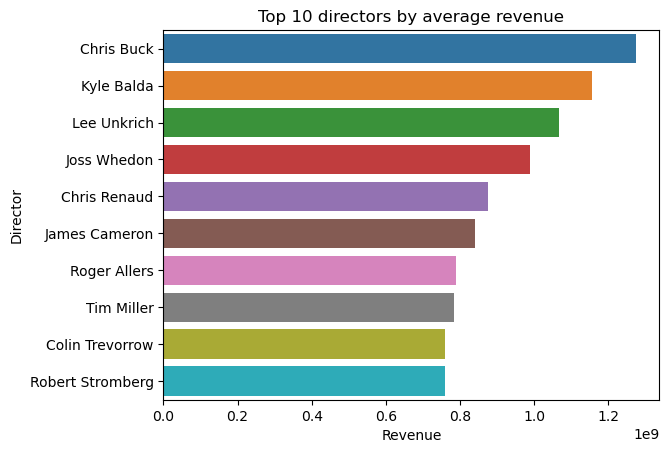

In [71]:
top_directors = df.groupby('director_name')['revenue'].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(y="director_name", x="revenue", data=top_directors)
plt.title("Top 10 directors by average revenue")
plt.ylabel("Director")
plt.xlabel("Revenue")
plt.savefig("../plots/top_directors.png")
plt.show()

### Saving the corrected version of the dataset

In [72]:
df.to_csv("../data/processed/movies_corrected.csv", index=False)